In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
df = pd.read_csv("gdrive/My Drive/American_Housing_Data_20231209.csv")

In [3]:
df.sample(20)

,Zip Code,Price,Beds,Baths,Living Space,Address,City,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude,Longitude
27613,80923,415000.0,3,2,1152,6115 GREAT PLAINS DR,Colorado Springs,Colorado,32050,1771.6,El Paso,109942.0,38.92673,-104.71433
26354,80211,795000.0,3,2,1419,2727 W 34TH AVE,Denver,Colorado,36330,3107.4,Denver,143444.0,39.76715,-105.02006
34798,93721,195000.0,2,2,960,2881 HUNTINGTON BLVD APT 260,Fresno,California,8168,1545.2,Fresno,44967.0,36.73282,-119.78383
26966,80904,550000.0,3,2,2549,829 PLEASANT ST,Colorado Springs,Colorado,21162,731.7,El Paso,95588.0,38.86321,-104.87197
18260,70126,339000.0,5,4,2015,6730 PAULINE DR,New Orleans,Louisiana,31168,996.5,Orleans,49971.0,30.01948,-90.01739
31507,89113,379000.0,3,3,1419,5332 GALANTHUS ST,Las Vegas,Nevada,34227,1226.9,Clark,116838.0,36.06017,-115.26236
39188,98103,849950.0,3,3,1420,3841 WOODLAND PARK AVE N APT A,Seattle,Washington,52210,4397.0,King,167932.0,47.67320,-122.34258
15881,66103,325000.0,3,1,1210,2105 W 43RD AVE,Kansas City,Kansas,13471,1114.6,Wyandotte,61950.0,39.06045,-94.62707
3479,23456,969900.0,5,4,3984,MM GARDENIA IL (ASHVILLE PARK),Virginia Beach,Virginia,60158,463.3,Virginia Beach,150363.0,36.73435,-76.03492
18,10301,950000.0,6,2,1920,76 HIGHLAND AVE,Staten Island,New York,38736,3980.1,Richmond,118113.0,40.62803,-74.09564


In [4]:
df.info()
print('####')
df.describe()
print('####')
df.describe(include='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39981 entries, 0 to 39980
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Zip Code                 39981 non-null  int64  
 1   Price                    39981 non-null  float64
 2   Beds                     39981 non-null  int64  
 3   Baths                    39981 non-null  int64  
 4   Living Space             39981 non-null  int64  
 5   Address                  39981 non-null  object 
 6   City                     39981 non-null  object 
 7   State                    39981 non-null  object 
 8   Zip Code Population      39981 non-null  int64  
 9   Zip Code Density         39981 non-null  float64
 10  County                   39981 non-null  object 
 11  Median Household Income  39979 non-null  float64
 12  Latitude                 39981 non-null  float64
 13  Longitude                39981 non-null  float64
dtypes: float64(5), int64(5

,Address,City,State,County
count,39981,39981,39981,39981
unique,38827,243,29,88
top,331 N 127TH ST E,Mesa,California,Maricopa
freq,20,894,6056,1782


In [5]:
# dropping unnecessary columns
df = df.dropna()

df = df.drop(['Zip Code','Address','Zip Code Density','Latitude','Longitude'], axis=1)
df['Price'] = abs(df['Price'])
# X = X.drop('Price', axis=1)

# X.head()
# y.head()

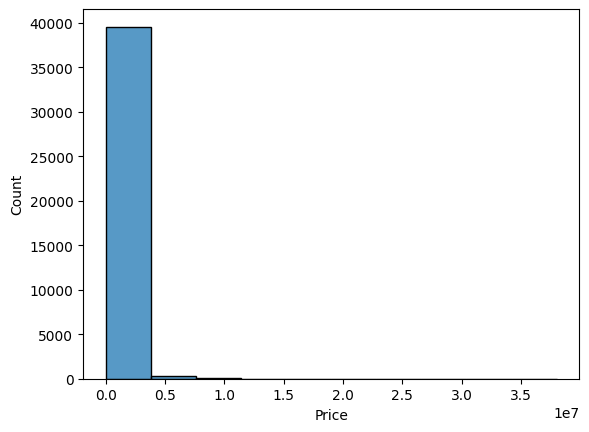

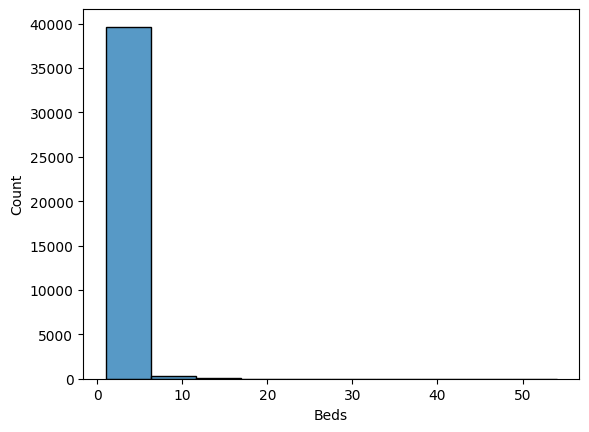

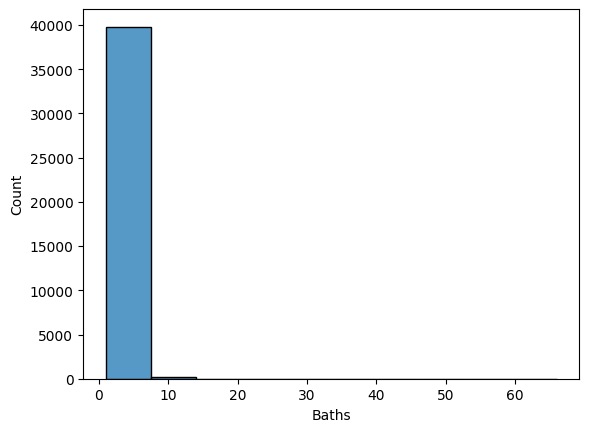

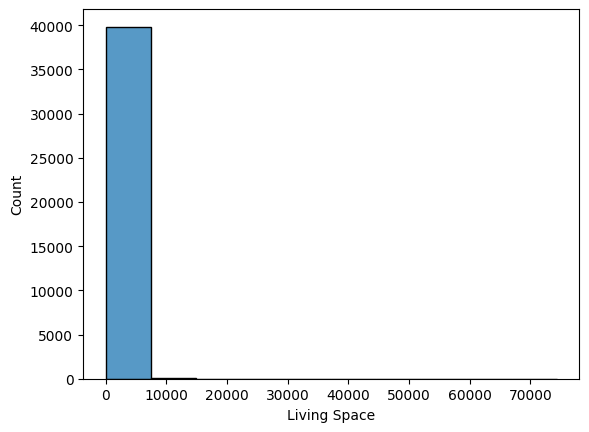

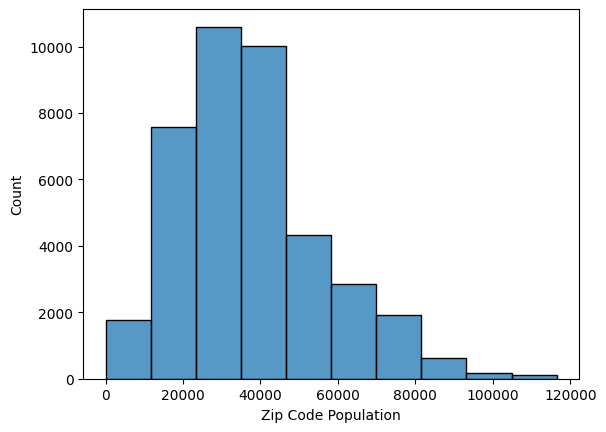

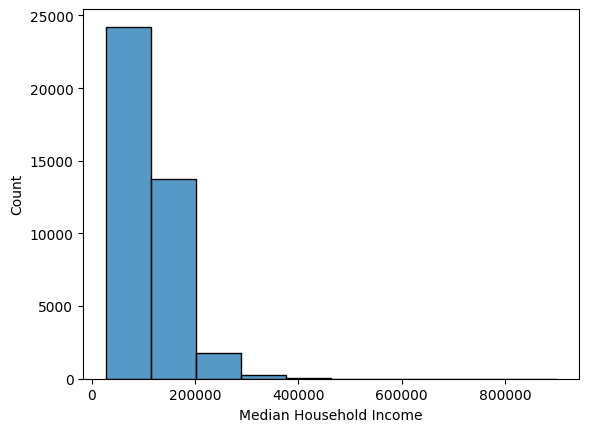

In [6]:
# Data visualization
# Hist plots of numeric columns
import matplotlib.pyplot as plt
import seaborn as sns

num_columns = df.select_dtypes(exclude='object').columns

for c in num_columns:
    plt.figure()
    sns.histplot(x=c, bins=10, data=df)
    plt.show()

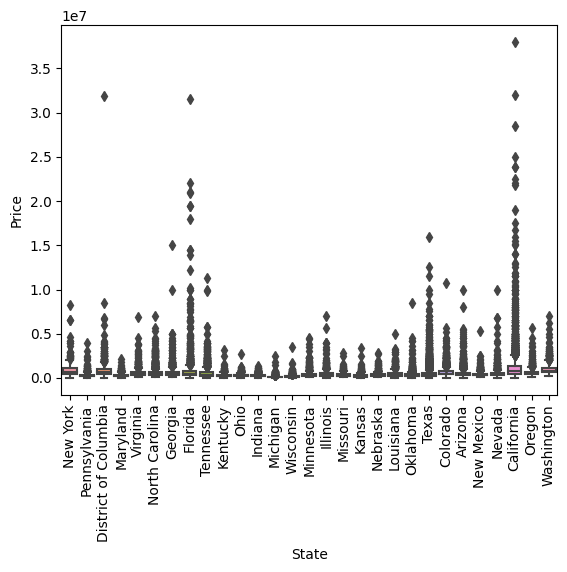

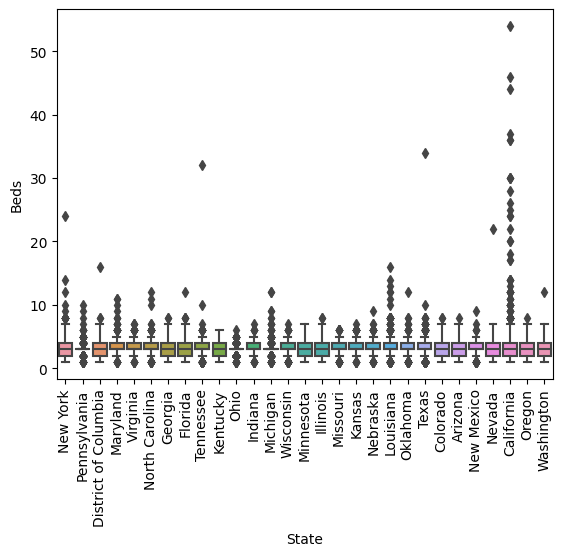

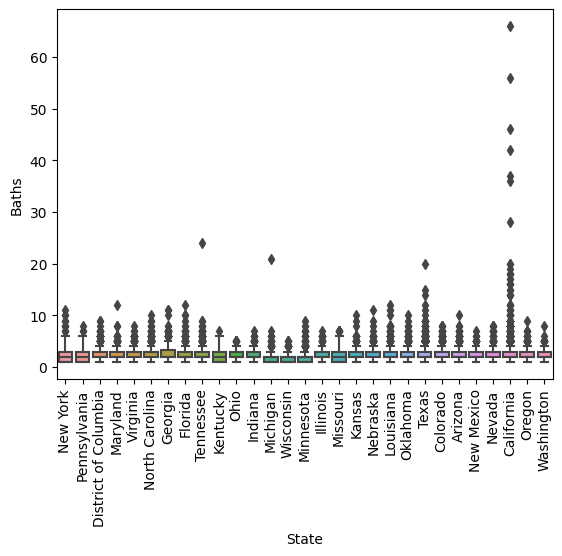

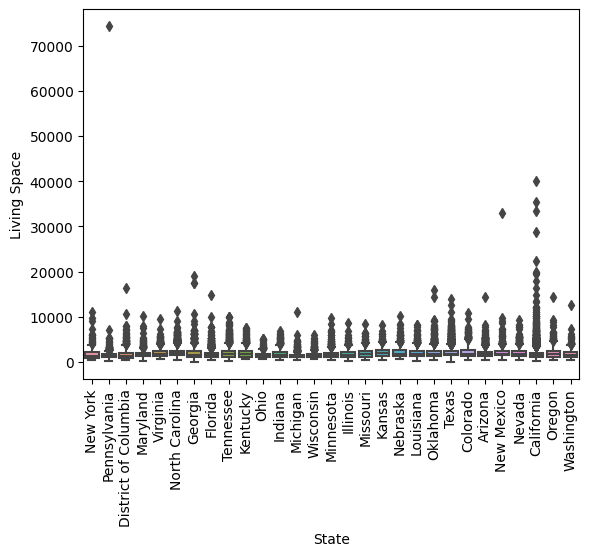

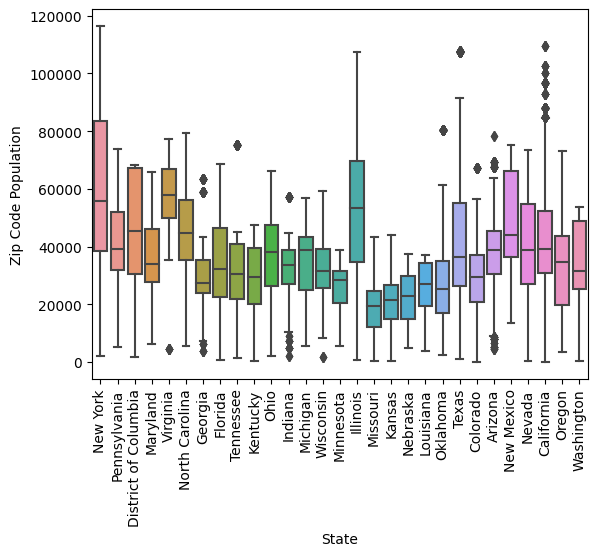

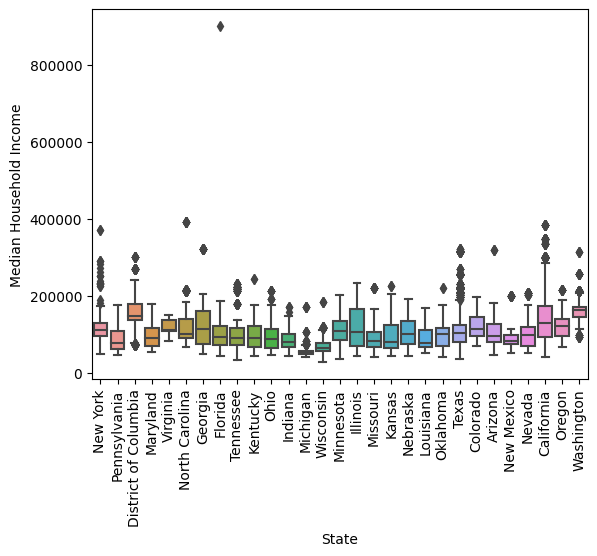

In [7]:
# boxplots

for c in num_columns:
    plt.figure()
    sns.boxplot(y=c, x='State', data=df)
    plt.xticks(rotation=90)
    plt.show()

In [8]:
df.head()

,Price,Beds,Baths,Living Space,City,State,Zip Code Population,County,Median Household Income
0,3999000.0,2,3,1967,New York,New York,29563,New York,370046.0
1,3999000.0,2,3,1967,New York,New York,29563,New York,370046.0
2,1650000.0,1,1,718,New York,New York,29815,New York,249880.0
3,760000.0,3,2,1538,New York,New York,29815,New York,249880.0
4,1100000.0,1,1,600,New York,New York,29815,New York,249880.0


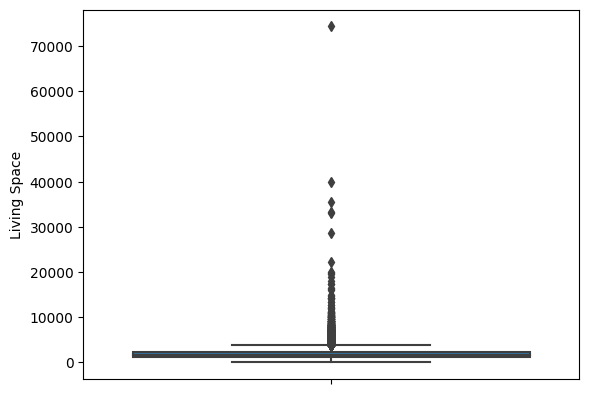

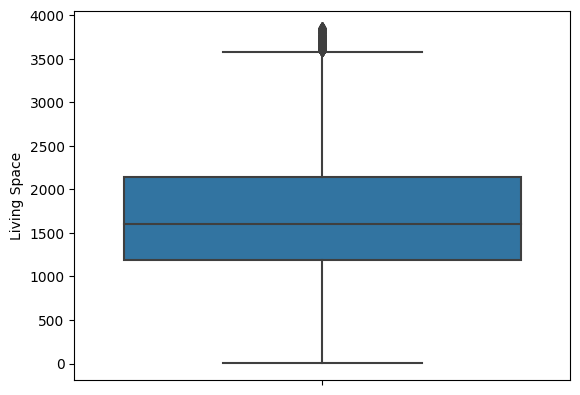

In [9]:

plt.figure()
sns.boxplot(y='Living Space', data=df)
plt.show()

####
# deleting outliers
Q1 = df['Living Space'].quantile(0.25)
Q3 = df['Living Space'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Living Space'] >= Q1 - 1.5*IQR) & (df['Living Space'] <= Q3 + 1.5*IQR)]
#####

plt.figure()
sns.boxplot(y='Living Space', data=df)
plt.show()

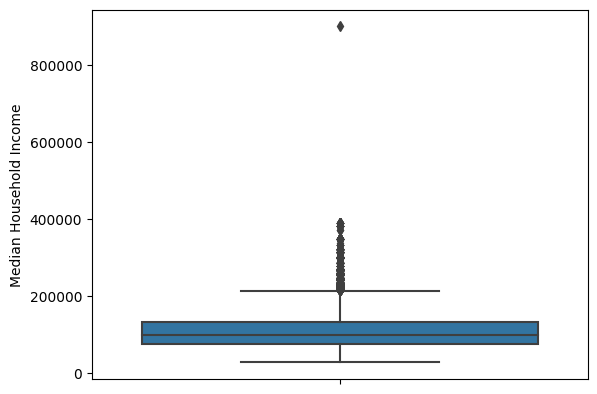

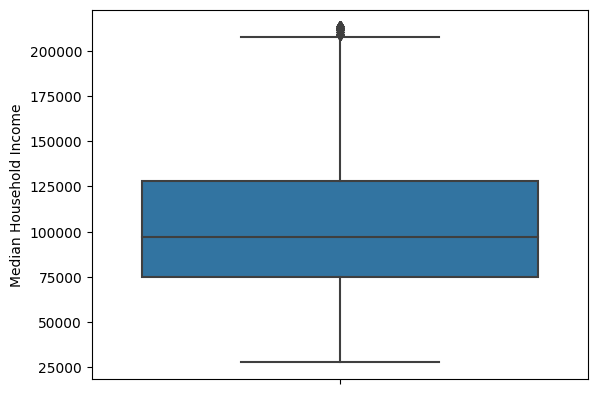

In [10]:

plt.figure()
sns.boxplot(y='Median Household Income', data=df)
plt.show()

####
# deleting outliers
Q1 = df['Median Household Income'].quantile(0.25)
Q3 = df['Median Household Income'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Median Household Income'] >= Q1 - 1.5*IQR) & (df['Median Household Income'] <= Q3 + 1.5*IQR)]
#####

plt.figure()
sns.boxplot(y='Median Household Income', data=df)
plt.show()

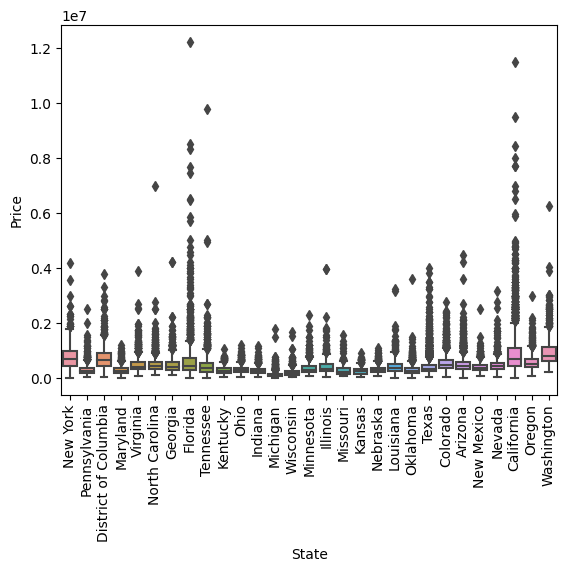

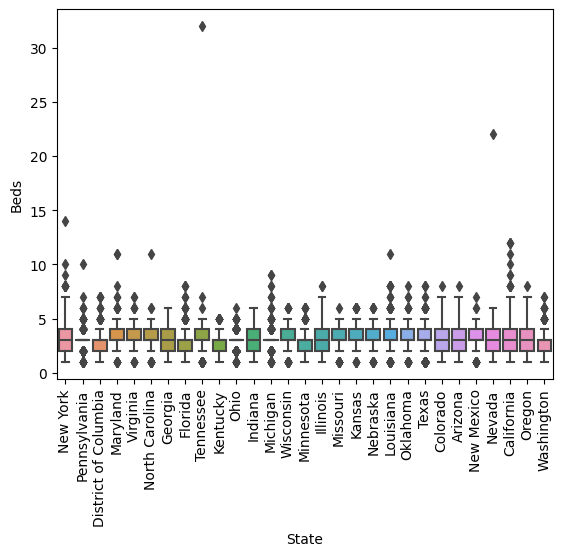

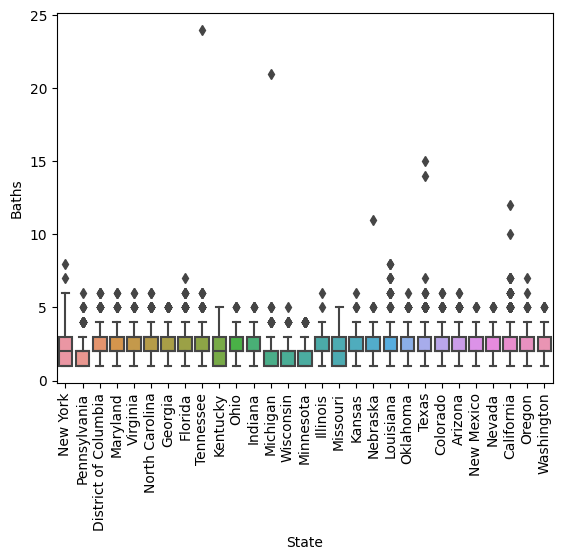

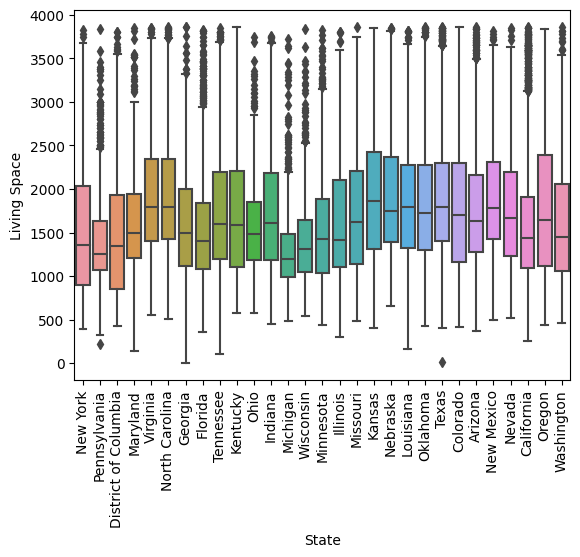

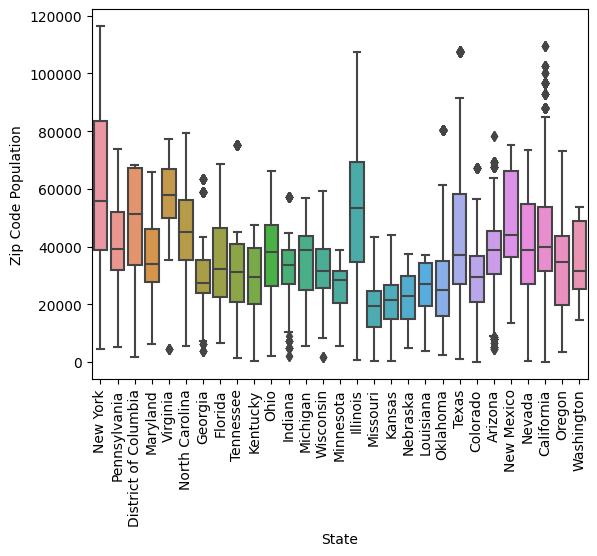

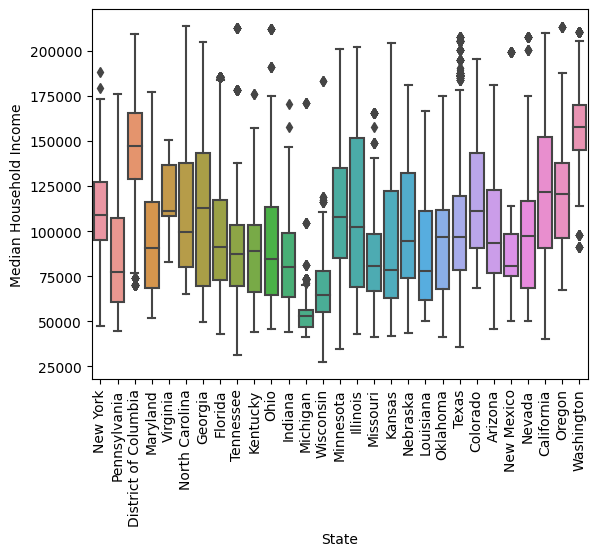

In [11]:
# boxplots

for c in num_columns:
    plt.figure()
    sns.boxplot(y=c, x='State', data=df)
    plt.xticks(rotation=90)
    plt.show()

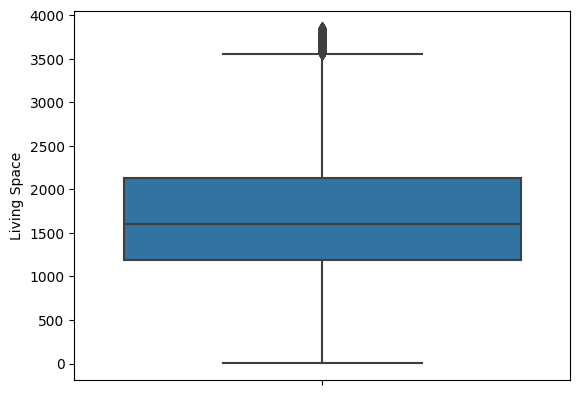

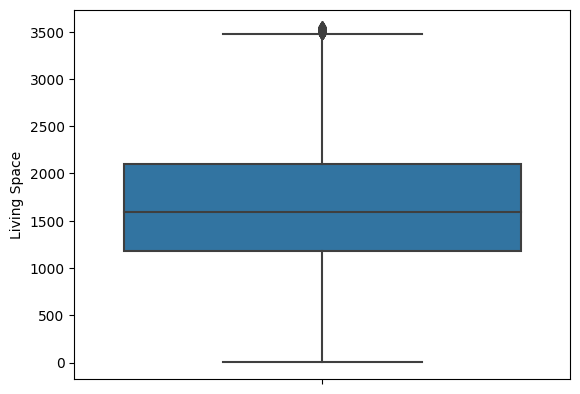

In [12]:

plt.figure()
sns.boxplot(y='Living Space', data=df)
plt.show()

####
# deleting outliers
Q1 = df['Living Space'].quantile(0.25)
Q3 = df['Living Space'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Living Space'] >= Q1 - 1.5*IQR) & (df['Living Space'] <= Q3 + 1.5*IQR)]
#####

plt.figure()
sns.boxplot(y='Living Space', data=df)
plt.show()

In [13]:
# encoding city, state, county
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Living Space'] = encoder.fit_transform(df[['Living Space']])
df['State'] = encoder.fit_transform(df[['State']])
df['County'] = encoder.fit_transform(df[['County']])
df['City'] = encoder.fit_transform(df[['City']])
df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

,Price,Beds,Baths,Living Space,City,State,Zip Code Population,County,Median Household Income
5,764900.0,1,1,209,144,18,15514,57,188289.0
8,540000.0,2,1,315,144,18,39401,57,117438.0
9,570000.0,1,1,157,144,18,39401,57,117438.0
10,699999.0,3,1,764,144,18,39401,57,117438.0
11,380000.0,1,1,216,144,18,39401,57,117438.0


In [14]:
# scaling
from sklearn.preprocessing import StandardScaler

sclr = StandardScaler()
df['Living Space'] = sclr.fit_transform(df[['Living Space']])
df['Zip Code Population'] = sclr.fit_transform(df[['Zip Code Population']])
df['Median Household Income'] = sclr.fit_transform(df[['Median Household Income']])
df['Beds'] = sclr.fit_transform(df[['Beds']])
df['Baths'] = sclr.fit_transform(df[['Baths']])
df.tail()

,Price,Beds,Baths,Living Space,City,State,Zip Code Population,County,Median Household Income
39976,2495000.0,0.944426,1.891034,2.499315,193,27,-0.818637,46,2.714731
39977,2295000.0,0.944426,1.891034,1.786514,193,27,-0.818637,46,2.714731
39978,950000.0,-0.047827,-0.308523,-0.463169,193,27,-0.818637,46,2.714731
39979,425000.0,-1.040080,-1.408302,-1.251160,193,27,-0.818637,46,2.714731
39980,1150000.0,-0.047827,0.791255,1.729370,193,27,-0.818637,46,2.714731


Linear Regression

In [15]:
y = df['Price']
X = df.drop('Price', axis=1)


In [16]:
m = X.shape[0]
X = np.hstack([np.ones((m,1)), X])
X

array([[ 1.00000000e+00, -2.03233274e+00, -1.40830227e+00, ...,
        -1.21099400e+00,  5.70000000e+01,  2.25306838e+00],
       [ 1.00000000e+00, -1.04007971e+00, -1.40830227e+00, ...,
         5.96457052e-02,  5.70000000e+01,  3.64762297e-01],
       [ 1.00000000e+00, -2.03233274e+00, -1.40830227e+00, ...,
         5.96457052e-02,  5.70000000e+01,  3.64762297e-01],
       ...,
       [ 1.00000000e+00, -4.78266836e-02, -3.08523428e-01, ...,
        -8.18636712e-01,  4.60000000e+01,  2.71473071e+00],
       [ 1.00000000e+00, -1.04007971e+00, -1.40830227e+00, ...,
        -8.18636712e-01,  4.60000000e+01,  2.71473071e+00],
       [ 1.00000000e+00, -4.78266836e-02,  7.91255419e-01, ...,
        -8.18636712e-01,  4.60000000e+01,  2.71473071e+00]])

In [17]:
from sklearn.utils import shuffle

from sklearn.model_selection import train_test_split
prng = np.random.RandomState(42)
shuffled_X, shuffled_y = shuffle(X, y, random_state=prng)


In [18]:
X_train, X_test, y_train, y_test = train_test_split(shuffled_X, shuffled_y, test_size=0.2)

In [20]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

In [21]:
reg.predict(X_test)

array([256920.43211134, 252822.6381052 , 355471.30600438, ...,
       340632.03638558, 667747.94413559, 353215.37329886])

In [22]:
beta_hat = reg.coef_
beta_hat

array([     0.        ,  -6664.71388814,  75203.82707421,  90044.84312407,
          400.61691292,  -8523.97478978,  14071.2344738 ,    726.26918081,
       161863.10641607])

In [23]:
# loss function

def loss_fun(y, y_hat):
    return 0.5 * np.mean((y - y_hat)**2)

In [24]:
# train evaluation

train_pred = X_train @ beta_hat
print(f"Train loss = {loss_fun(y_train, train_pred)}")

Train loss = 191467254601.19598


In [25]:
# test evaluation

test_pred = X_test @ beta_hat
print(f"Test loss = {loss_fun(y_test, test_pred)}")

Test loss = 193144946909.0763


In [26]:
# from scratch

def linear_regression(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y

In [27]:
beta_hat = linear_regression(X_train, y_train)
beta_hat

array([ 5.18829385e+05, -6.66471389e+03,  7.52038271e+04,  9.00448431e+04,
        4.00616913e+02, -8.52397479e+03,  1.40712345e+04,  7.26269181e+02,
        1.61863106e+05])

In [28]:
# train evaluation

train_pred = X_train @ beta_hat
print(f"Train loss = {loss_fun(y_train, train_pred)}")

Train loss = 56875289211.417656


In [29]:
# test evaluation

test_pred = X_test @ beta_hat
print(f"Test loss = {loss_fun(y_test, test_pred)}")

Test loss = 57105862157.38449
